In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [6]:
df = pd.read_csv("Data/TATASTEEL.csv")
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.487110,10242229
1,1996-01-02,11.172855,11.214964,10.951082,10.979155,2.440925,16954313
2,1996-01-03,10.979155,11.229000,10.951082,10.981962,2.441549,13514114
3,1996-01-04,10.807913,10.807913,10.386825,10.633863,2.364159,34785820
4,1996-01-05,10.504730,10.555260,10.316644,10.423319,2.317349,30138033


In [7]:

start_date=df.Date[0]
end_date=df.Date[len(df)-1]
    
print(start_date)
print(end_date)


1996-01-01
2023-08-04


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6935,2023-07-31,120.599998,123.849998,120.599998,123.150002,123.150002,52330311
6936,2023-08-01,123.550003,124.150002,122.550003,123.199997,123.199997,27863562
6937,2023-08-02,122.900002,122.900002,118.250000,118.949997,118.949997,54951586
6938,2023-08-03,118.699997,119.650002,117.500000,118.199997,118.199997,34624188
6939,2023-08-04,119.400002,119.750000,118.000000,119.000000,119.000000,22303966


In [9]:
df= df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,11.172855,11.214964,11.035300,11.186892,10242229
1,11.172855,11.214964,10.951082,10.979155,16954313
2,10.979155,11.229000,10.951082,10.981962,13514114
3,10.807913,10.807913,10.386825,10.633863,34785820
4,10.504730,10.555260,10.316644,10.423319,30138033


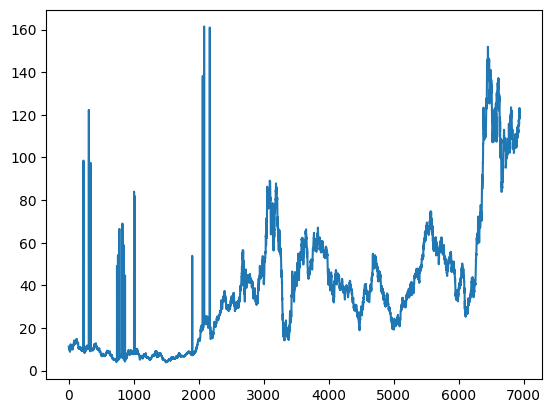

In [10]:
plt.plot(df.Close)

In [11]:
ma100= df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
6935    109.552
6936    109.714
6937    109.847
6938    109.964
6939    110.072
Name: Close, Length: 6940, dtype: float64

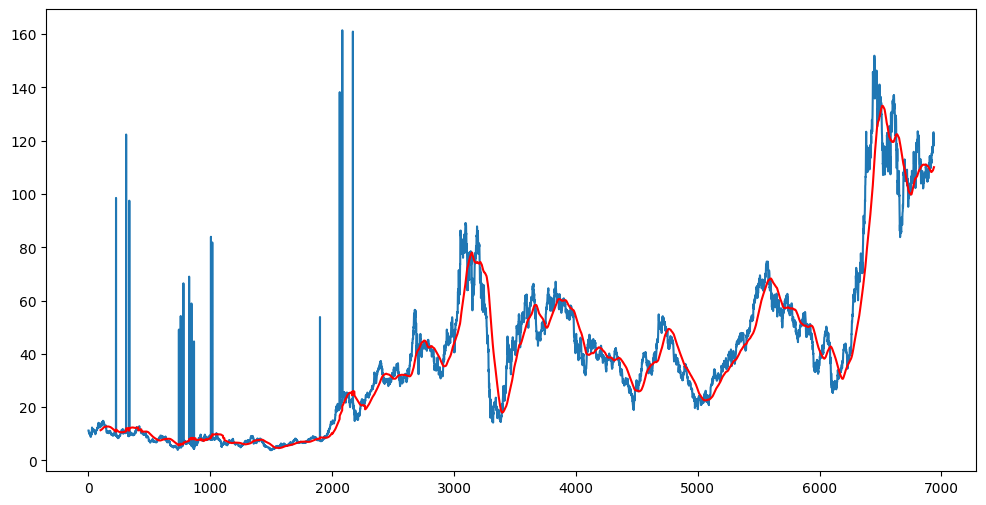

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

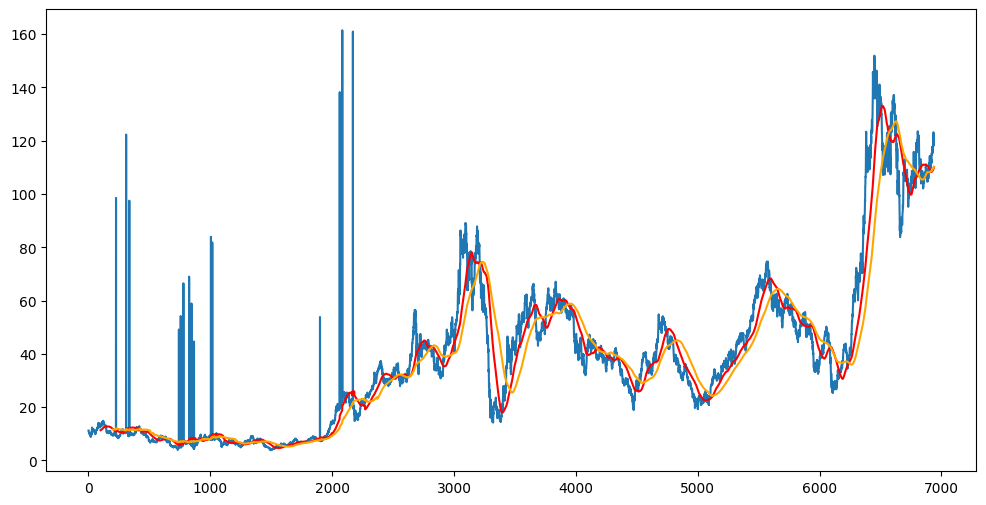

In [13]:
ma200= df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'orange')

In [14]:
df.shape

(6940, 5)

In [15]:
#data training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) 
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))]) 
print(data_training.shape)
print(data_testing.shape)

(4858, 1)
(2082, 1)


In [16]:
data_training.head()

,Close
0,11.186892
1,10.979155
2,10.981962
3,10.633863
4,10.423319


In [17]:
data_testing.head()
len(data_testing)

2082

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))


In [19]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.04699196],
       [0.04567476],
       [0.04569256],
       ...,
       [0.18459559],
       [0.18788795],
       [0.18903574]])

In [20]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train , y_train = np.array(x_train),np.array(y_train)
len(x_train)

4758

In [21]:
x_train.shape
#y_train.shape

(4758, 100, 1)

In [22]:
# Implementing ML Model
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [23]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
 
model.add(Dense(units=1))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [28]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100,batch_size=128)

Epoch 1/100
38/38 [==============================] - 98s 1s/step - loss: 0.0028
Epoch 2/100
38/38 [==============================] - 40s 1s/step - loss: 0.0023
Epoch 3/100
38/38 [==============================] - 40s 1s/step - loss: 0.0021
Epoch 4/100
38/38 [==============================] - 30s 777ms/step - loss: 0.0021
Epoch 5/100
38/38 [==============================] - 16s 415ms/step - loss: 0.0021
Epoch 6/100
38/38 [==============================] - 16s 415ms/step - loss: 0.0020
Epoch 7/100
38/38 [==============================] - 18s 466ms/step - loss: 0.0019
Epoch 8/100
38/38 [==============================] - 17s 443ms/step - loss: 0.0019
Epoch 9/100
38/38 [==============================] - 18s 470ms/step - loss: 0.0018
Epoch 10/100
38/38 [==============================] - 17s 435ms/step - loss: 0.0018
Epoch 11/100
38/38 [==============================] - 18s 482ms/step - loss: 0.0018
Epoch 12/100
38/38 [==============================] - 18s 478ms/step - loss: 0.0017
Epoch 13/1

In [29]:
model.save('new_keras_model.h5')

C:\Users\manth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
data_testing.head()

,Close
4858,33.645893
4859,33.169525
4860,32.702686
4861,32.040531
4862,31.592747


In [31]:
past_100_days=data_training.tail(100)
past_100_days

,Close
4758,43.735374
4759,42.758820
4760,41.934704
4761,43.459080
4762,44.545200
...,...
4853,34.212772
4854,33.431526
4855,32.888470
4856,33.407711


In [32]:
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)
len(data_testing)

2082

In [33]:
final_df.head()

,Close
0,43.735374
1,42.758820
2,41.934704
3,43.459080
4,44.545200


In [34]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.18491082],
       [0.17755458],
       [0.17134664],
       ...,
       [0.75149125],
       [0.74584162],
       [0.75186792]])

In [35]:
input_data.shape

(2182, 1)

In [36]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [37]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(2082, 100, 1)
(2082,)


In [38]:
y_pridicted=model.predict(x_test)

66/66 [==============================] - 6s 70ms/step


In [39]:
y_pridicted

array([[0.12278382],
       [0.12188419],
       [0.12085612],
       ...,
       [0.6941706 ],
       [0.68894374],
       [0.6812788 ]], dtype=float32)

In [40]:
y_test.shape

(2082,)

In [41]:
y_pridicted

array([[0.12278382],
       [0.12188419],
       [0.12085612],
       ...,
       [0.6941706 ],
       [0.68894374],
       [0.6812788 ]], dtype=float32)

In [42]:
scaler=scaler.scale_

In [43]:
scaler_factor=1/scaler[0]
y_pridicted=y_pridicted*scaler_factor
y_test=y_test*scaler_factor

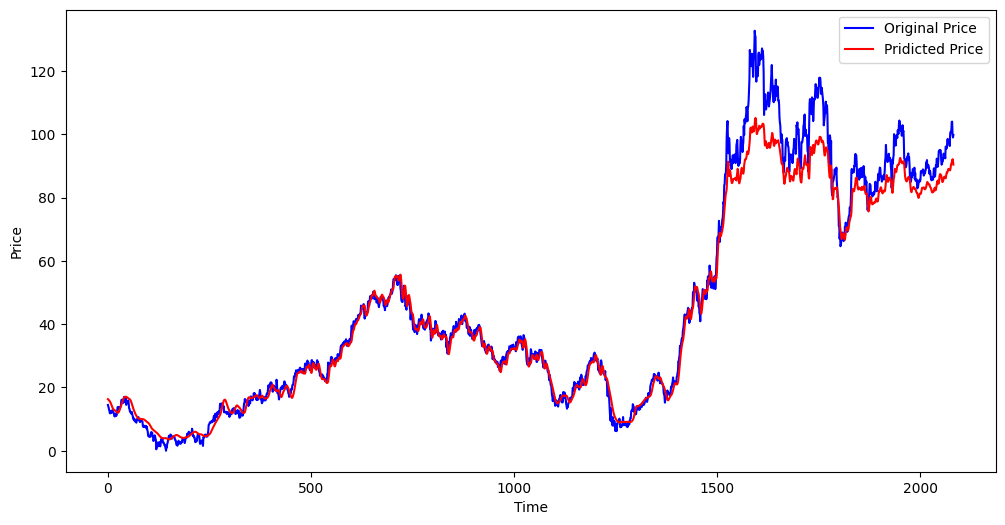

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'blue',label='Original Price')
plt.plot(y_pridicted,'red',label='Pridicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()